[<img src="https://upload.wikimedia.org/wikipedia/commons/b/b8/Graph-tool-logo.png">](https://graph-tool.skewed.de/static/doc/index.html)

# Descrição do notebook
Aprendendo a usar o pacote `graph-tool`.

 - [ ] Criação e manipulação de grafos 
   - [X] Criação de grafos: como criar grafos a partir de listas de arestas ou vertices. 
   - [X] Manipulação de grafos: adição e remoção de vertices e arestas.
   - [X] Visualização de grafos: como desenhar grafos.
   - [X] Grafos dirigidos.
   - [X] Grafos ponderados.
   - [X] Criação de grafos a partir de matriz de adjacências.
 - [ ] Operações envolvendo grafos 
   - [ ] Acesso à vertices e arestas.
   - [ ] União e composição de grafos.
   - [ ] Conversão de grafos 
     - [ ] Grafos dirigidos em não dirigidos.
     - [ ] Grafos nao dirigidos em dirigidos.
     - [ ] Grafos ponderados em nao ponderados.
 - [ ] Propriedades estruturais de grafos (ou resultados em redes complexas)
   - [ ] Detectar componentes de uma rede
   - [ ] Acesso a vizinhos em uma rede
   - [ ] Medidas de conectividade.
   - [ ] Medidas de centralidade.
   - [ ] Medidas de transitividade.
 - [ ] Modelos de grafos 
   - [ ] Grafos aleatórios
   - [ ] Grafo de Erdos-Renyi (Modelo $G_{np}$)
   - [ ] Modelo de Barabási-Albert

In [15]:
import graph_tool as gt
from graph_tool.all import *
gt.show_config()

version: 2.45 (commit cc4b7c3a, Sun May 22 23:48:12 2022 +0200)
gcc version: 12.2.1
compilation flags: -DNDEBUG  -fopenmp -O3 -fvisibility=default -fvisibility-inlines-hidden -Wno-deprecated -Wall -Wextra -ftemplate-backtrace-limit=0 -march=x86-64 -mtune=generic -O2 -pipe -fno-plt -fexceptions         -Wp,-D_FORTIFY_SOURCE=2 -Wformat -Werror=format-security         -fstack-clash-protection -fcf-protection  -O3 -march=native -flto=auto -fno-fat-lto-objects 
install prefix: /usr
python dir: /usr/lib/python3.10/site-packages
graph filtering: True
openmp: True
uname: Linux muaddib 6.1.11-arch1-1 #1 SMP PREEMPT_DYNAMIC Thu, 09 Feb 2023 20:06:08 +0000 x86_64


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

#  Criação e manipulação de grafos    

In [3]:
# por padrão os grafos são dirigidos
g = gt.Graph(directed = False)

- Adicionando vertices e arestas ao grafo.
A função `add_vertex` retorna uma instância de `Vertex`:https://graph-tool.skewed.de/static/doc/graph_tool.html#graph_tool.Vertex.


In [4]:
v1 = g.add_vertex()
v2 = g.add_vertex()

# aresta entre os vertices v1 e v2
e = g.add_edge(v1, v2)

## Criação de grafos: como criar grafos a partir de listas de arestas ou vertices.   

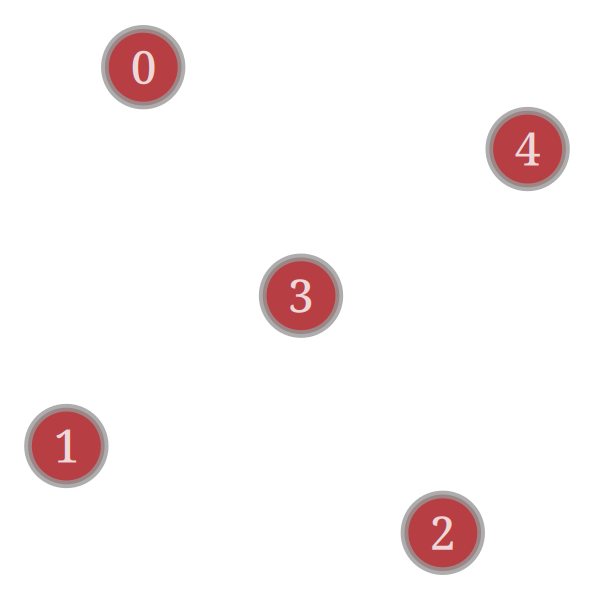

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28af0f7130, at 0x7f28af0f68f0>

In [5]:
g = gt.Graph(directed = False)

# adiciona 10 vertices.
g.add_vertex(5) 
graph_draw(g, vertex_text=g.vertex_index, output_size=(300, 300))

Para o caso da criação de grafo com lista de arestas, pode ser feito manualmente:

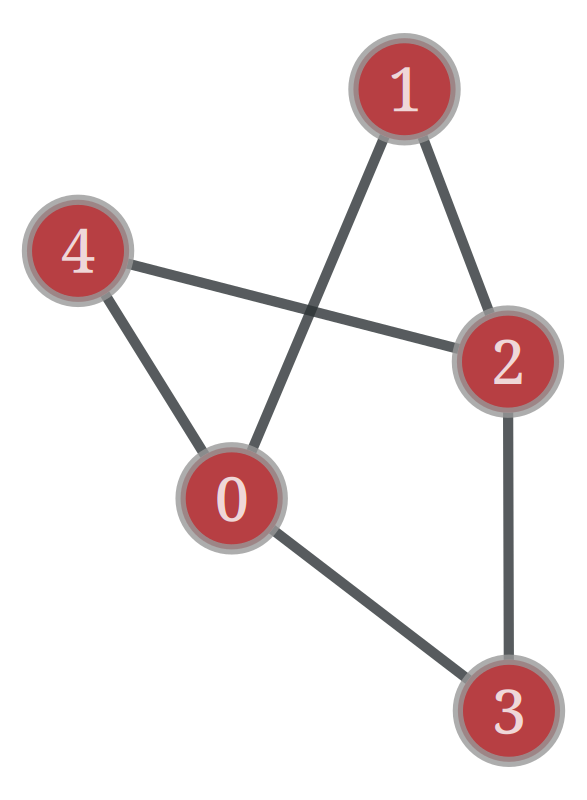

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28af0f7130, at 0x7f28af0f6290>

In [6]:
# Cada tupla é uma aresta e os valores são os indices dos vertices
edgelist =  [[0, 1], [4, 2], [2, 3], [2, 1], [0, 3], [4, 0]]
g.add_edge_list(edgelist)
graph_draw(g, vertex_text=g.vertex_index, output_size=(400, 400))

##  Manipulação de grafos: adição e remoção de vertices e arestas   

In [7]:
e = g.add_edge(g.add_vertex(), g.add_vertex())
g.remove_edge(e)

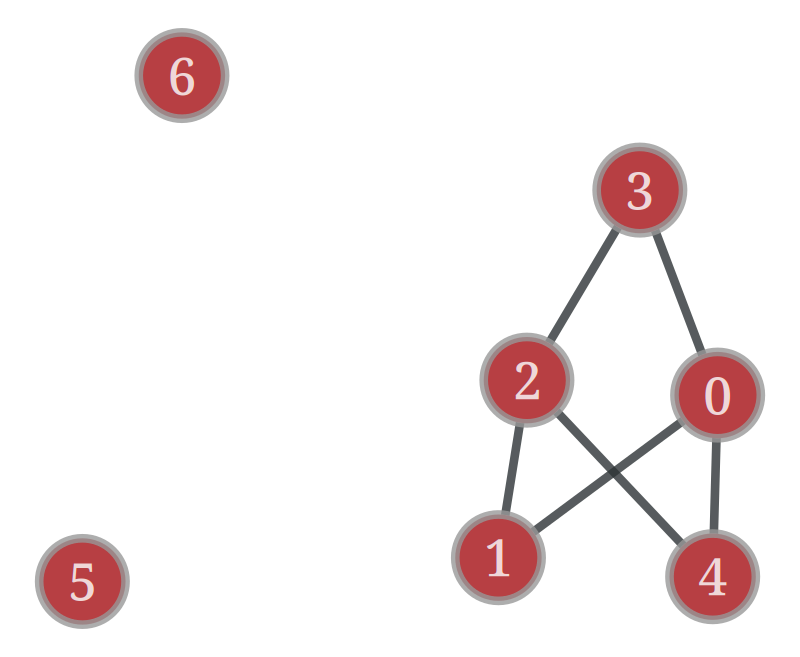

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28af0f7130, at 0x7f28aeedc2e0>

In [8]:
graph_draw(g, vertex_text=g.vertex_index, output_size=(400, 400))

Os vertices separados do componente grande da rede são possuiam uma aresta que foi removida.

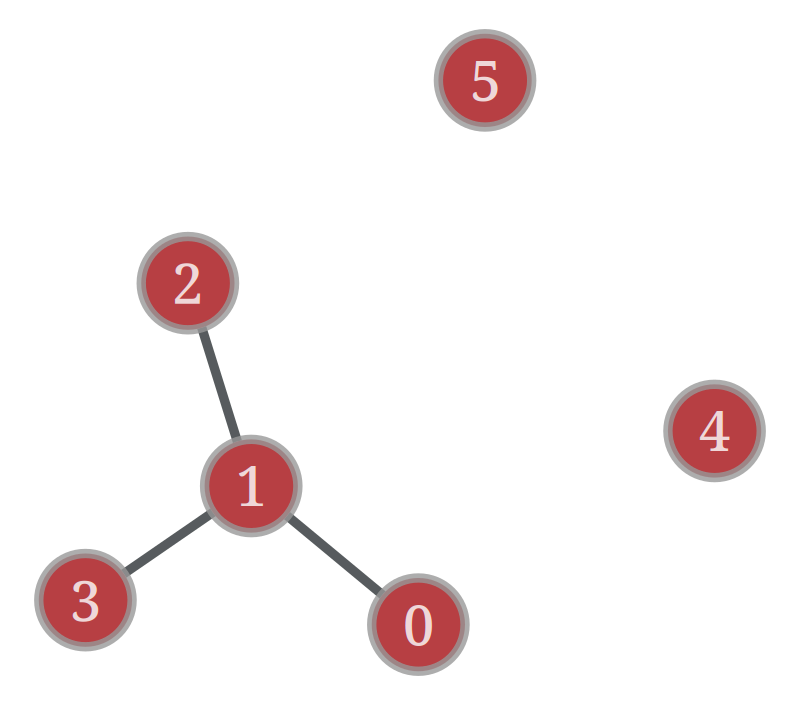

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28af0f7130, at 0x7f28aeedc3d0>

In [9]:
g.remove_vertex(g.vertex_index[0])
graph_draw(g, vertex_text=g.vertex_index, output_size=(400, 400))

## Visualização de grafos: como desenhar grafos   

- https://graph-tool.skewed.de/static/doc/draw.html#layout-algorithms

## Grafos dirigidos   
Como os grafos são dirigidos por padrão, basta criar um grafo.

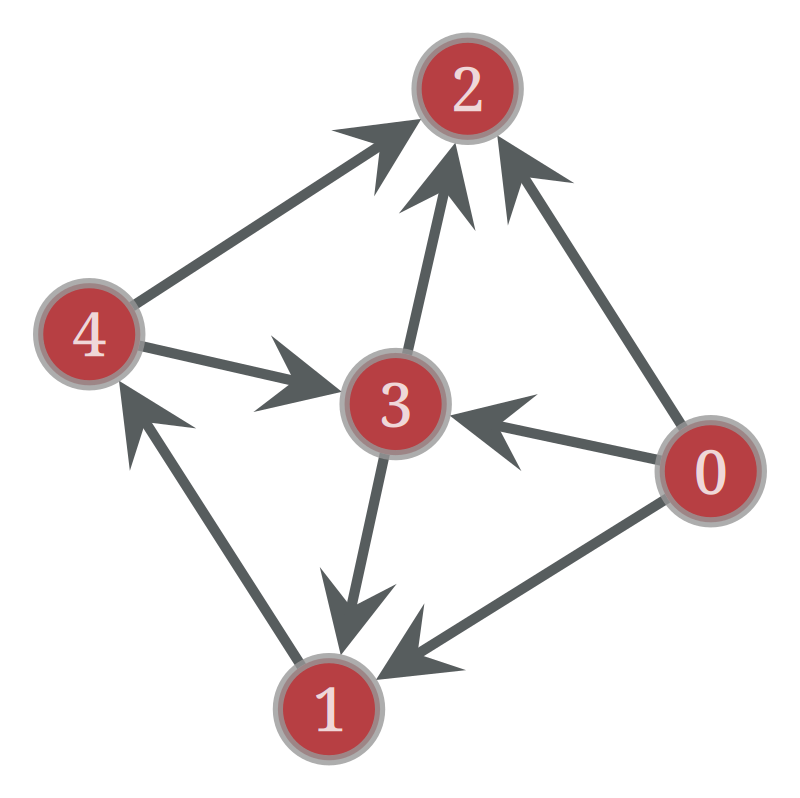

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28af0f7c70, at 0x7f28aeeddc00>

In [10]:
g = gt.Graph()

vlist = g.add_vertex(5)

g.add_edge(g.vertex_index[0], g.vertex_index[1])
g.add_edge(g.vertex_index[0], g.vertex_index[2])
g.add_edge(g.vertex_index[0], g.vertex_index[3])
g.add_edge(g.vertex_index[3], g.vertex_index[1])
g.add_edge(g.vertex_index[3], g.vertex_index[2])
g.add_edge(g.vertex_index[4], g.vertex_index[2])
g.add_edge(g.vertex_index[1], g.vertex_index[4])
g.add_edge(g.vertex_index[4], g.vertex_index[3])

graph_draw(g, vertex_text=g.vertex_index, output_size=(400, 400))

## Grafos ponderados   

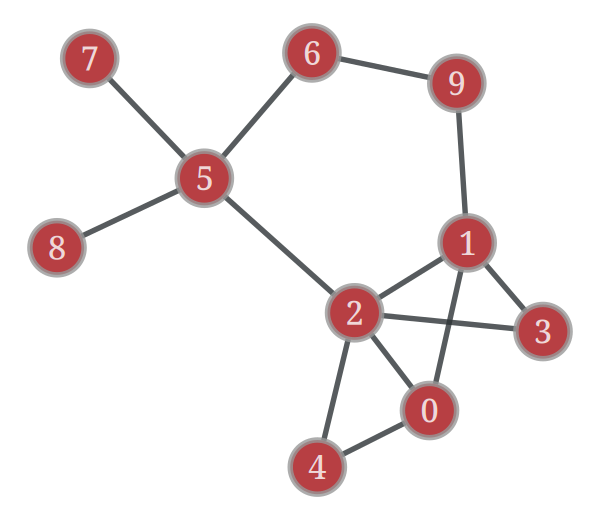

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28af0f5b10, at 0x7f28aeedcfd0>

In [11]:
g = gt.Graph(directed = False)
edgelist = [(0, 1, 0.1), (1, 2, 0.5), (0, 2, 0.9), (2, 3, 0.5), (2, 4, 0.2), (1, 3, 0.5), (4, 0, 0.9), (5, 2, 0.6),
           (5, 6, 0.1), (5, 7, 0.8), (5, 8, 0.9), (1, 9, 0.6), (9, 6, 0.9)]

eweight = g.new_ep("double")
g.add_edge_list(edgelist, eprops=[eweight])

pos = sfdp_layout(g)
graph_draw(g, vertex_text=g.vertex_index, output_size=(300, 300))

- Desenhando grafo com arestas de largura relativa ao peso.

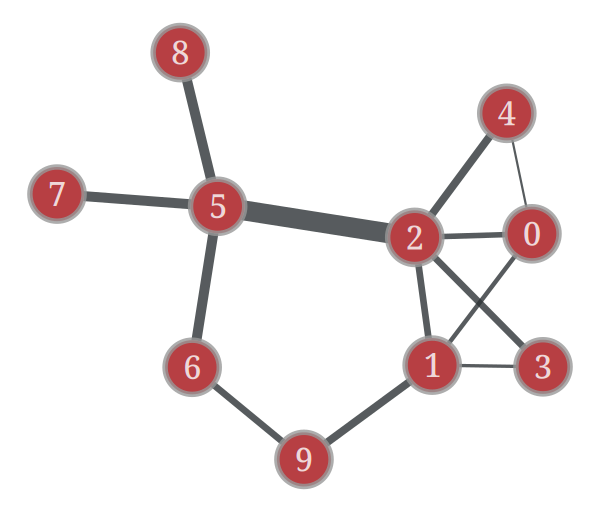

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28af0f5b10, at 0x7f291ac36b90>

In [12]:
ebet = betweenness(g)[1]
ebet.a /= ebet.a.max() / 10.
pos = sfdp_layout(g)
graph_draw(g, pos=pos, vertex_text=g.vertex_index, edge_pen_width=ebet, output_size=(300, 300))

## Criação de grafos a partir de matriz de adjacências

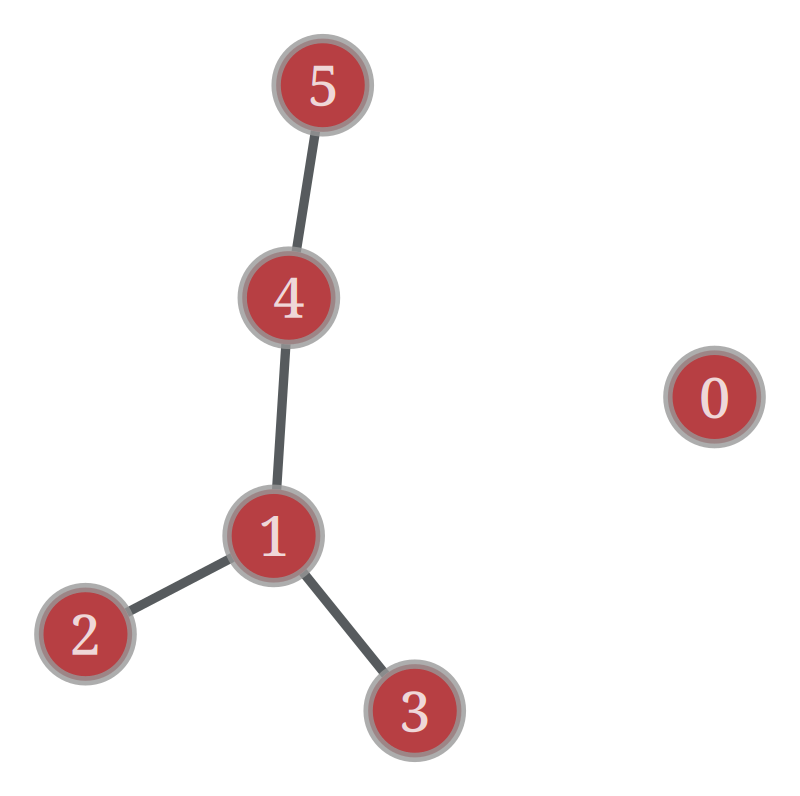

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28aedec910, at 0x7f28aeedf400>

In [30]:
edgelist = [[1, 2], [1, 3], [1, 4], [4, 5]]
g = gt.Graph(directed = False)
g.add_edge_list(edgelist)
graph_draw(g, vertex_text=g.vertex_index,  output_size=(400, 400))

# Operações envolvendo grafos 
  

## Acesso à vertices e arestas   

## União e composição de grafos   

## Conversão de grafos    

### Grafos dirigidos em não dirigidos    

### Grafos nao dirigidos em dirigidos    

### Grafos ponderados em nao ponderados

# Propriedades estruturais de grafos (ou resultados em redes complexas)

## Medidas de conectividade

##  Medidas de centralidade

##   Medidas de transitividade

# Modelos de grafos 

##  Grafos aleatórios   

## Grafo de Erdos-Renyi (Modelo $G_{np}$)   

## Modelo de Barabási-Albert